In [1]:
import numpy as np

In [40]:
class Particle:
    def __init__(self, dim, bounds):
        self.position = np.random.uniform(bounds[0], bounds[1], dim)
        self.velocity = np.random.uniform(-1, 1, dim)
        self.best_position = np.copy(self.position)
        self.best_score = -np.inf  # Since we are maximizing

    def update_velocity(self, global_best_position, w, c1, c2):
        inertia = w * self.velocity
        cognitive = c1 * np.random.random() * (self.best_position - self.position)
        social = c2 * np.random.random() * (global_best_position - self.position)
        self.velocity = inertia + cognitive + social

    def update_position(self, bounds):
        self.position += self.velocity
        self.position = np.clip(self.position, bounds[0], bounds[1])


class PSOAgent:
    def __init__(self, num_particles, optimization_function, w=0.5, c1=1.5, c2=1.5):
        self.dim = len(optimization_function.bounds()[0])
        self.bounds = optimization_function.bounds()
        
        self.swarm = [Particle(self.dim, self.bounds) for _ in range(num_particles)]
        self.global_best_position = None
        self.global_best_score = -np.inf  # Since we are maximizing
        self.optimization_function = optimization_function
        self.w = w
        self.c1 = c1
        self.c2 = c2

        # To store the history of global best positions and their values
        self.global_best_positions = []
        self.global_best_scores = []

    def optimize(self, iterations=10000):
        for _ in range(iterations):
            for particle in self.swarm:
                score = self.optimization_function.evaluate(particle.position.reshape(1, -1))
                if score > particle.best_score:
                    particle.best_score = score
                    particle.best_position = particle.position
                    
                if score > self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = particle.position
                    
                    # Store the new global best positions and their values
                    self.global_best_positions.append(self.global_best_position)
                    self.global_best_scores.append(self.global_best_score)
                    
            for particle in self.swarm:
                particle.update_velocity(self.global_best_position, self.w, self.c1, self.c2)
                particle.update_position(self.bounds)

        return self.global_best_positions, self.global_best_scores



In [41]:
from environment.optimization_functions.barrel import *

In [55]:


# Create an instance of the optimization function class, e.g., NegRosenbrockFunction
optimization_function = RosenbrockFunction()

# Create an instance of the PSOAgent with the optimization function
pso_agent = PSOAgent(num_particles=30, optimization_function=optimization_function, w=0.0, c1=1.5, c2=1.5)

global_best_positions, global_best_scores = pso_agent.optimize(iterations=1000)
print(global_best_positions[-1], global_best_scores[-1])


[2.12469179 4.51283633] [-1.26515034]


In [47]:
global_best_positions

[array([ 2.22314881, -2.42627905]),
 array([-0.72932009,  1.38648026]),
 array([-1.35672463,  0.87159502]),
 array([-0.8829968 ,  1.75718052]),
 array([-1.04245719,  2.41242214]),
 array([-0.81863898,  0.48641015]),
 array([ 0.69286005, -2.19676063]),
 array([ 0.09816157, -0.68271187]),
 array([-0.71554782,  1.23981773]),
 array([ 0.37521935, -1.27406022]),
 array([ 0.4617895 , -0.48601286]),
 array([-0.22319851,  1.69698358]),
 array([0.04233092, 0.9800218 ]),
 array([ 1.30883245, -0.15081698]),
 array([0.67138449, 0.78114187]),
 array([0.52987104, 0.63226738]),
 array([0.62078648, 0.54636459]),
 array([0.81230623, 0.35190335]),
 array([0.72450701, 0.44307147]),
 array([0.72597244, 0.44065113]),
 array([0.82234752, 0.87306982]),
 array([0.87344111, 0.79319914]),
 array([0.81918784, 0.75891698]),
 array([0.94150143, 0.89308801]),
 array([1.09684745, 1.20261146]),
 array([1.06884172, 1.08386306]),
 array([1.02434498, 1.03148465]),
 array([1.34220502, 1.47635614]),
 array([0.87459754, 0.

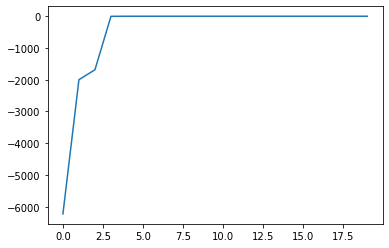

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(global_best_scores)